# Ch02.10. 여러가지시각화 플롯

---

* 날짜:2022-04-21
* 이름:안창덕


# **등치지도**

In [ ]:
import folium

In [ ]:
m = folium.Map([37.566, #경도
                126.9780], #위도
                zoom_start=12)
m

# **워드클라우드**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [ ]:
df= sns.load_dataset("mpg")
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320


In [ ]:
text = [temp.split()[0] for temp in df['name']]
text[:4]

['chevrolet', 'buick', 'plymouth', 'amc']

In [ ]:
text = " ".join(text)
text[:50]

'chevrolet buick plymouth amc ford ford chevrolet p'

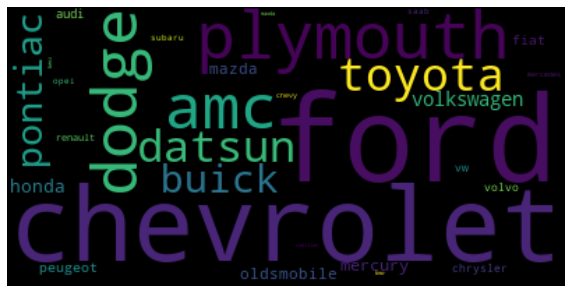

In [ ]:
word_cloud = WordCloud(collocations=False, background_color="black").generate(text)

plt.figure(figsize=(10,6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **Donut Graph**

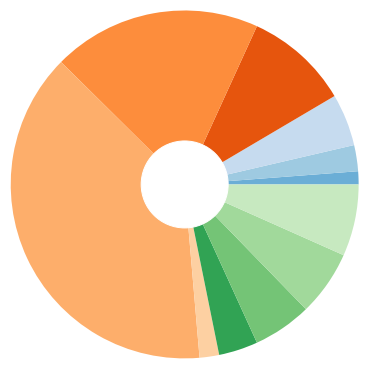

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

cmap = plt.get_cmap('tab20c')
outer_colors = cmap(np.array([1,2,3,4,5,6,7,8,9,10,11])) #비율마다 색깔
donut = [2,4,8,16,32,64,3,6,9,10,11]  #원안에 비율

plt.pie(donut, radius=2.0, colors=outer_colors) 

incir = plt.Circle((0,0),0.5, color = 'white') #안에 들어가는 원색깔
p=plt.gcf()    #주석???
p.gca().add_artist(incir)

plt.show()

# **Boxplot**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


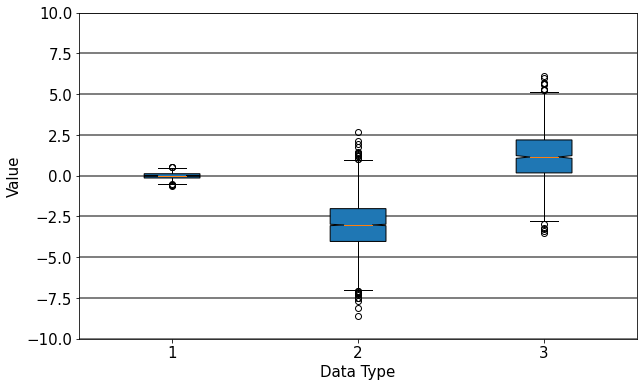

In [ ]:
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['font.size']=15

np.random.seed(0)
data_a=np.random.normal(0,0.2,1000)
data_b=np.random.normal(-3.0,1.5,5000)
data_c=np.random.normal(1.2,1.5,1500)

fig, ax = plt.subplots()

bp = ax.boxplot([data_a, data_b, data_c],
               notch=True, #가운데 들어감?
               patch_artist=True,  #박스 속 색
               )

ax.set_ylim(-10, 10, 10, 0)
ax.set_xlabel('Data Type')
ax.set_ylabel('Value')

plt.grid(color='gray', linewidth=2, axis='y')
plt.show()

# **트리맵**
정확한 값을 알기보다 비율을 알고 싶을때

In [ ]:
!pip install squarify
import squarify as s

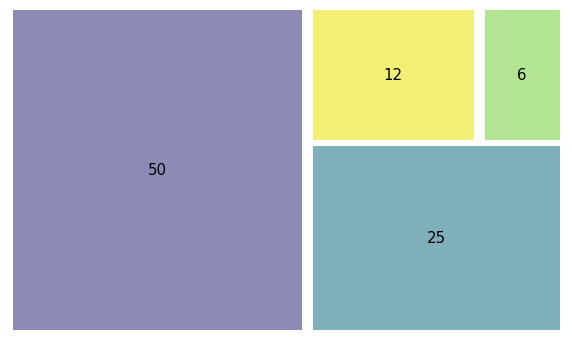

In [ ]:
sizes = [50,25,12,6]
label = [sizes[i] for i in range(4)] # ==range(len(sizes))

s.plot(sizes,
       label = label,
       alpha = 0.6,
       pad=True  #그래프사이 간격
       )
plt.axis('off')
plt.show()

# **네트워크 다이아그램**
sns 분석할때

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

df = pd.DataFrame({'from' : ['A','B','C','D'],
                   'to' : ['B','A','D','C']})
G = nx.from_pandas_edgelist(df, 'from', 'to', create_using = nx.DiGraph())

nx.draw(G,
        with_labels=True,
        node_size = 1000,
        node_color = 'slateblue',
        alpha=0.5,
        width = 5,
      #  arrow = True,
        font_size = 15,
        font_weight = 'bold')

plt.title('Directed Network Diagram Sample', size = 20, pad=20)
plt.show()

# **3차원 산점도**

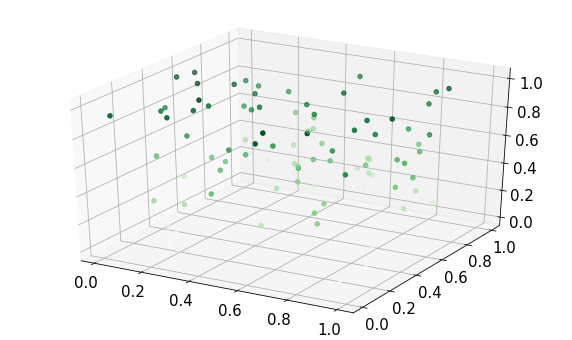

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

x = np.random.rand(100)
y = np.random.rand(100)
z = np.random.rand(100)


ax=plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='Greens')

plt.show()


# **버블맵**
버블의 크기가 수치

In [ ]:
import pandas as pd
df = pd.read_csv('/content/sample_data/california_housing_test.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
import plotly.express as px
px.scatter_mapbox(df, lat='latitude', lon='longitude',
                  size=df.population, #마크의 크기
                  size_max=10,
                  mapbox_style='open-street-map')

# **Sankey Diagram(생키다이어그램)**
화살표 굵기가 수치

범주가 많을 때 어떻게 나눠어지는지를 잘 알 수 있게 해준다.

In [ ]:
source = [0,0,  #아메리카에서 갈라져나온거
          1,1,  #아이패드, 아이폰
          2,2]  #게임, 앱
target = [1,2,  
          3,4,   # source의 배치 순서?
          5,6]
value = [8.4, 3.0,
         5.2, 3.2,
         2.3, 0.7] # source의 값들
label = ['America App store spend',
         'IPone',
         'IPad',
         'Pone Game',
         'Phone Apps',
         'Pad Game',
         'Pad Apps']
import plotly.graph_objects as go

link=dict(source= source, target = target, value= value)
node=dict(label=label)

data = go.Sankey(link=link, node=node)

go.Figure(data)